<a href="https://colab.research.google.com/github/iamNirmeshGupta/Google-Play-Store-App-Rating-Prediction/blob/main/PlayStore_App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alma better/Playstore App Rating Prediction/googleplaystore.csv")

In [145]:
# Basic Inspection
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [146]:
# Basic Inspection
df.shape

(10841, 13)

In [147]:


# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are null values in few of the columns and also the data type of some of the columns is not approprate. Let's dive deep into the dataset and do some data cleaning.

#Data Cleaning

In [148]:
# Checking null count
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [149]:
# Checking duplicate count
df.duplicated().sum()

483

In [150]:
# Dropping duplicate records
df.drop_duplicates(inplace=True)

In [151]:

df.duplicated().sum()

0

In [152]:
df.shape

(10358, 13)

##Rating Column

In [153]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [154]:
# Imputing the null values present in Rating column with its mean
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [155]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [156]:
# Dropping other records with null values
df.dropna(inplace=True)

In [157]:
df.isna().sum().sum()

0

##Size Column

In [158]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [159]:
df['Size'].value_counts()

Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
15M                    174
17M                    155
26M                    145
16M                    143
19M                    135
10M                    133
25M                    131
20M                    131
21M                    130
24M                    129
18M                    124
23M                    109
22M                    108
29M                     95
27M                     94
28M                     92
30M                     84
33M                     78
3.3M                    76
37M                     72
31M                     69
35M                     68
2.5M                    68
2.3M                    68
2.9M                    67
2.8M                    65
3.4M                    64
3.7M                    63
32M                     62
3.0M                    61
3.9M                    61
3.8M                    60
4

We need to replace units from the Size column.

In [160]:
# Removing redundant units present and replacing with empty string
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)


In [161]:
# Changing datatype of Size column to 'Float'
df['Size'] = df['Size'].apply(lambda x: float(x))

In [162]:
#Dropping Null values
df.dropna(inplace=True)

In [163]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


##Installs Column

In [164]:
# Replacing '+' and ',' signs with empty string
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)

In [165]:
# Changing datatype to Integer
df['Installs'] = df['Installs'].apply(lambda x: int(x))

##Reviews Column

In [166]:
# Changing datatype to Integer
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [167]:



# Dropping records where number of Installs are less than reviews as these imply False reviews
df.drop(df[df['Installs']<df['Reviews']].index, inplace=True)

##Price Column

In [168]:
# Replacing '$' sign from Prices
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$','') if '$' in x else x)

In [169]:
# Changing datatype to float
df["Price"] = df['Price'].apply(lambda x: float(x))

##Outlier Detection

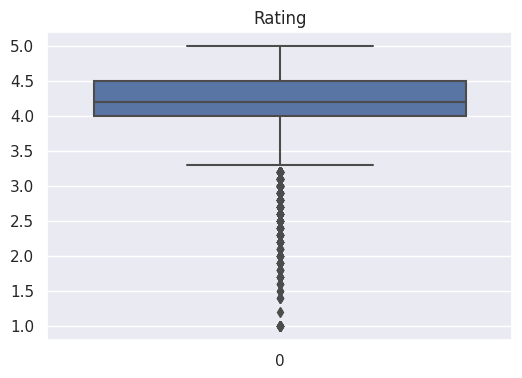

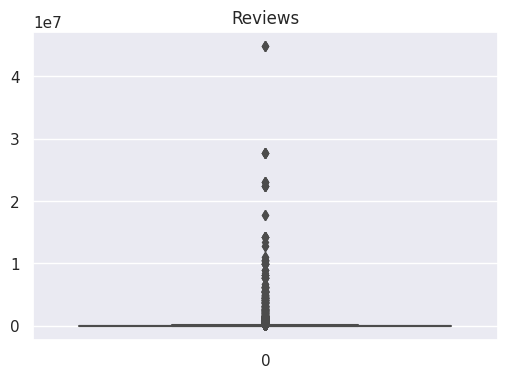

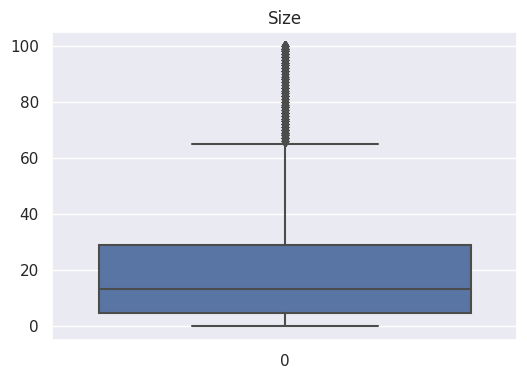

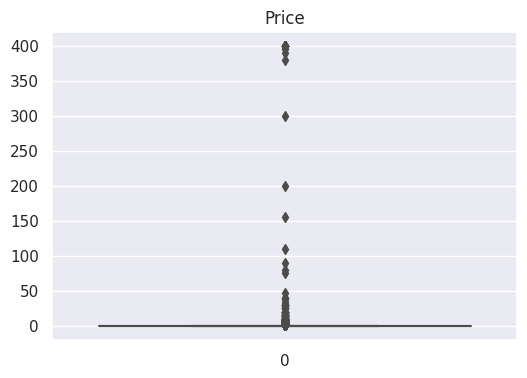

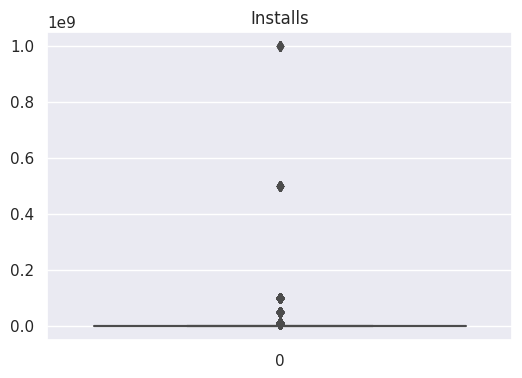

In [170]:
num_cols = ['Rating','Reviews','Size','Price','Installs']

sns.set(rc={'figure.figsize':(6,4)})
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()


There are many outliers present in 'Price', 'Reviews', 'Installs' columns.

##Outlier Treatment

In [171]:
# Capping the columns with appropriate value and removing outliers
df.drop(df[df['Price']>200].index, inplace=True)
df.drop(df[df['Reviews']>2000000].index, inplace=True)
df.drop(df[df['Rating']>10000000].index, inplace=True)

##Checking for skewness in dependent variable

<ipython-input-175-72a9646d102e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'], color = 'b')


Text(0.5, 0, 'Rating')

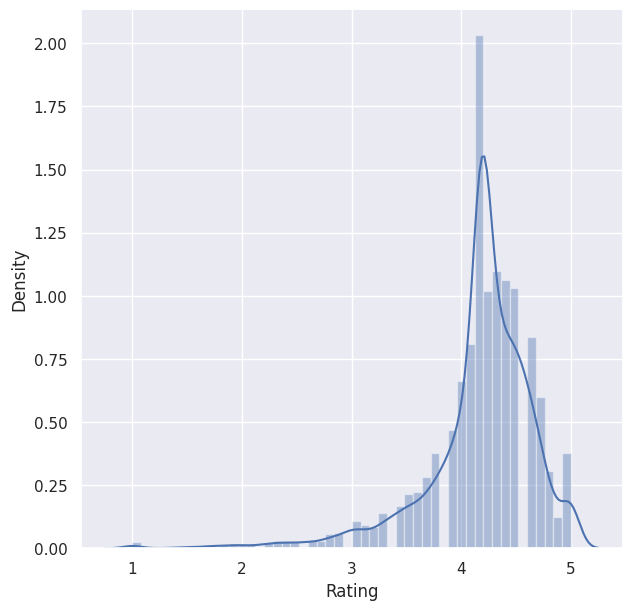

In [175]:
plt.figure(figsize=(7,7))
sns.distplot(df['Rating'], color = 'b')
plt.xlabel('Rating')

In [173]:
df['Rating'].agg(['skew','kurtosis']).transpose()

skew       -1.882461
kurtosis    6.363036
Name: Rating, dtype: float64

Our independent variable is negatively skewed. Let us try to apply some transformation over it to deal with the skewness.

<ipython-input-180-7dd40bfd2264>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Rating'])**2, color = 'b')


Text(0.5, 0, 'Rating')

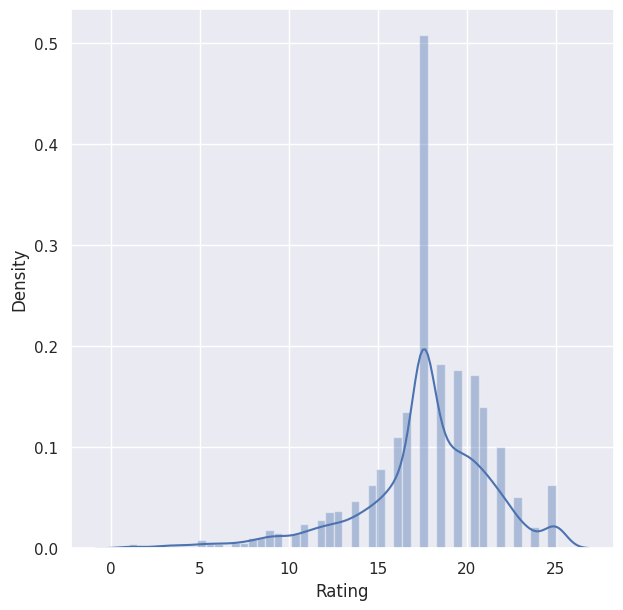

In [180]:
# Checking the distribution after applying square transformation
plt.figure(figsize=(7,7))
sns.distplot((df['Rating'])**2, color = 'b')
plt.xlabel('Rating')

Applying square transformation has reduced skewness. So I will apply square transformation during modelling part to the dependent variable.

#Data Visualization


In [181]:
# Category value counts
df['Category'].value_counts().reset_index(name='Count').nlargest(10,'Count')

,index,Count
0,FAMILY,1775
1,GAME,868
2,TOOLS,726
3,BUSINESS,379
4,MEDICAL,379
5,PERSONALIZATION,346
6,LIFESTYLE,331
7,FINANCE,297
8,PRODUCTIVITY,294
9,SPORTS,292


Text(0.5, 0, 'Categories')

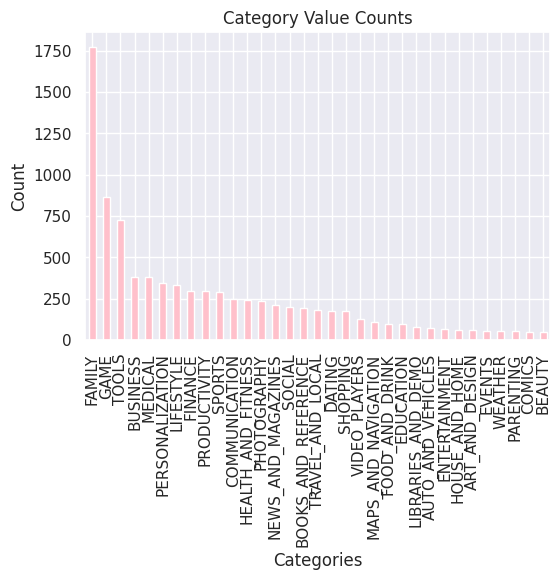

In [182]:
df["Category"].value_counts().plot(kind='bar',color='pink')
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Category Value Counts')
plt.ylabel('Count')
plt.xlabel('Categories')

##Bivariate Analysis

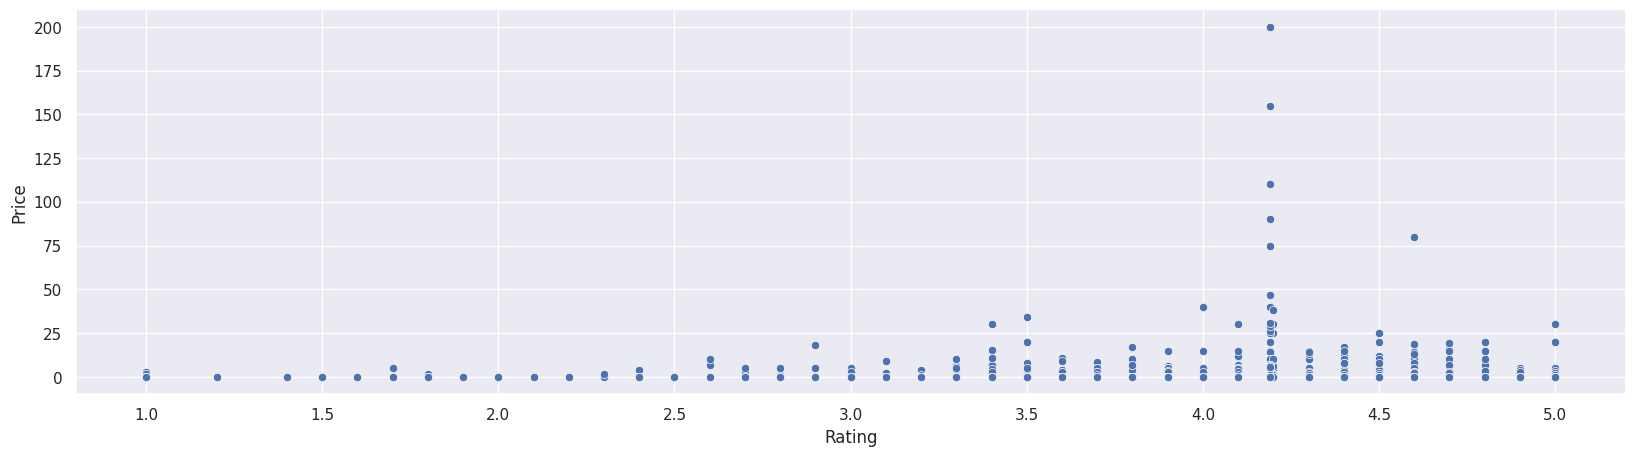

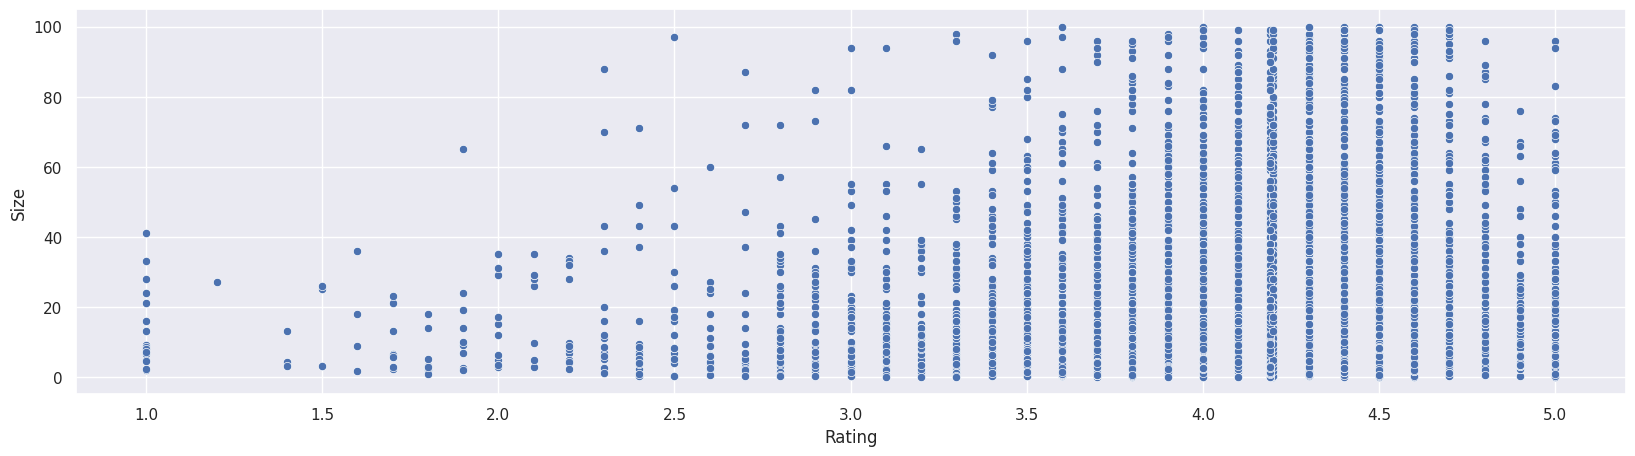

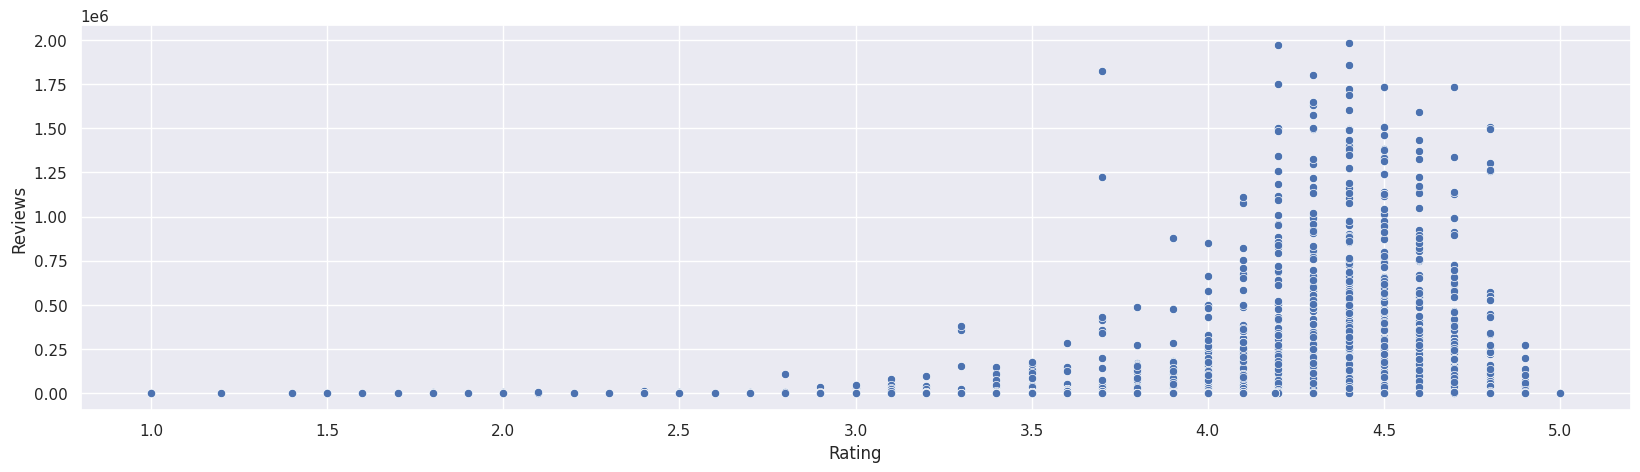

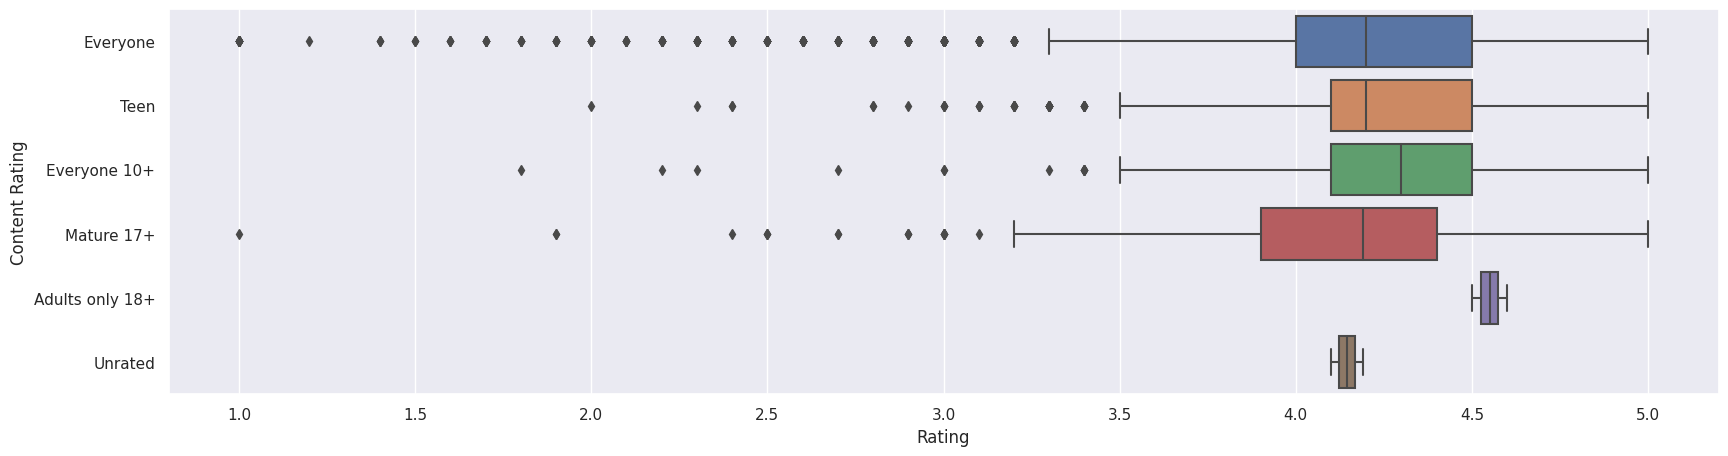

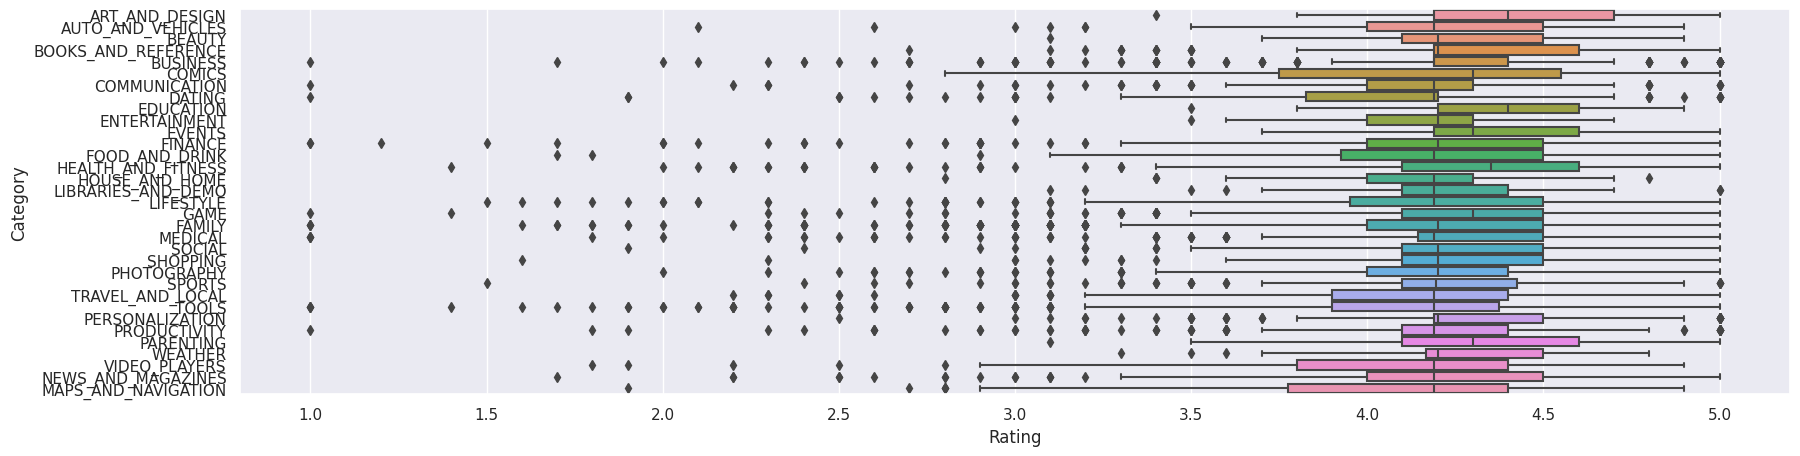

In [183]:
cols = ['Price','Size','Reviews','Content Rating','Category']

for i in cols:
  if i=='Price' or i=='Size' or i=='Reviews':
    sns.scatterplot(x='Rating', y=i, data=df)
    plt.show()
  else:
    sns.boxplot(x='Rating', y=i, data=df)
    plt.show()

Rating VS Price: Paid apps are higher rated than free apps. \
Rating VS Size: Heavy are apps are rated better. \
Rating VS Reviews: More reviews make app rating better. \
Rating VS Content Rating: Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings. \
Rating VS Category: Events category has best ratings compare to others.

##Correlation Heatmap

<ipython-input-184-a18791492169>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()), annot=True, cmap='Spectral_r')


<Axes: >

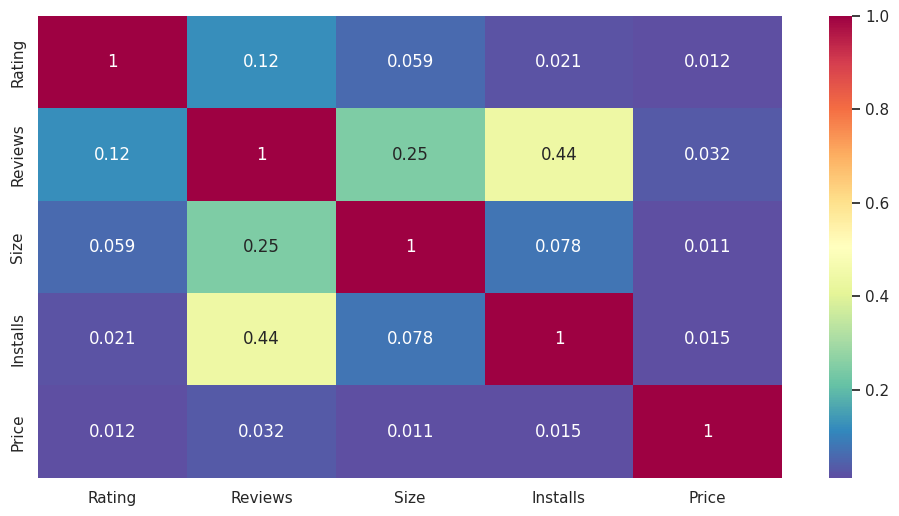

In [184]:
plt.figure(figsize=(12,6))
sns.heatmap(abs(df.corr()), annot=True, cmap='Spectral_r')

There is a high correlation between Installs and Reviews.

# Feature Engineering

##Skewness Check

In [185]:
df.skew()

<ipython-input-185-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rating      -1.882461
Reviews      5.190931
Size         1.628068
Installs    31.246360
Price       30.432668
dtype: float64

Reviews, Installs and Price columns are highly skewed. We need to apply transformations in order to deal with the skewness.

In [186]:
col = ['Reviews','Installs','Price']
for i in col:
  df[i] = np.log1p(df[i])

In [187]:

df.skew()

<ipython-input-187-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rating     -1.882461
Reviews     0.060223
Size        1.628068
Installs   -0.251604
Price       4.667520
dtype: float64

I have successfully dealt with the skewness.

##Encoding Categorical Features

###One hot encoding Column "Category" and "Content Rating

In [188]:
df['Category'].nunique()

33

In [189]:
df['Content Rating'].nunique()

6

In [190]:
# Creating a copy of the original dataframe
df1 = df.copy()

In [191]:

#One hot encoding Category
df1 = pd.get_dummies(df1,columns = ['Category','Content Rating'], prefix = ['Category','Content Rating'], drop_first=True)

In [192]:
df1.head(3)

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19.0,9.210440,Free,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,6.875232,14.0,13.122365,Free,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379520,8.7,15.424949,Free,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [193]:
# Number of categories in Genres column
df['Genres'].nunique()

116

There are way too many categories in Genres. Hence, we will try to reduce some categories which have very few samples under them and put them under one new common category i.e. "Other"

In [194]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less than 20 append those into the list
for i in df1.Genres.value_counts().index:
    if df1.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
df1.Genres = ['Other' if i in lists else i for i in df1.Genres]

In [195]:

#Storing the genres column into x varible and delete the genres col from dataframe df1
#And concat the encoded cols to the dataframe df1
df1.Genres = pd.Categorical(df1['Genres'])
x = df1[["Genres"]]
del df1['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
df1 = pd.concat([df1,dummies], axis=1)

In [196]:

df1.shape

(8588, 97)

We can drop columns like- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model.

In [197]:
#Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod
df1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)

In [198]:
df1.shape

(8588, 92)

In [199]:
df1.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Genres_Action,Genres_Adventure,Genres_Arcade,Genres_Art & Design,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Books & Reference,Genres_Business,Genres_Card,Genres_Casino,Genres_Casual,Genres_Casual;Pretend Play,Genres_Comics,Genres_Communication,Genres_Dating,Genres_Education,Genres_Education;Education,Genres_Educational,Genres_Educational;Education,Genres_Entertainment,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Maps & Navigation,Genres_Medical,Genres_News & Magazines,Genres_Other,Genres_Parenting,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19.0,9.210440,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,13.122365,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25.0,17.727534,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
df1.isna().sum()

Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Category_AUTO_AND_VEHICLES        0
Category_BEAUTY                   0
Category_BOOKS_AND_REFERENCE      0
Category_BUSINESS                 0
Category_COMICS                   0
Category_COMMUNICATION            0
Category_DATING                   0
Category_EDUCATION                0
Category_ENTERTAINMENT            0
Category_EVENTS                   0
Category_FAMILY                   0
Category_FINANCE                  0
Category_FOOD_AND_DRINK           0
Category_GAME                     0
Category_HEALTH_AND_FITNESS       0
Category_HOUSE_AND_HOME           0
Category_LIBRARIES_AND_DEMO       0
Category_LIFESTYLE                0
Category_MAPS_AND_NAVIGATION      0
Category_MEDICAL                  0
Category_NEWS_AND_MAGAZINES       0
Category_PARENTING                0
Category_PERSONALIZATION    

#Model Implementation

In [201]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.metrics import r2_score


In [202]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature
df2 = df1
X = df2.drop('Rating',axis=1)
y = df2['Rating']**2

#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [203]:
regressors = {'LinearRegression':lin_reg, 'RandomForest':rf_reg}

**Since we have taken the square transformation for the dependent variable, so we will take the square root of it in order to get correct values for the metrics and error.**

In [204]:
# Defining a regression function to train and predict for all models simultaneously
def train_regressor(regressor,x_train,y_train,x_test,y_test):
  regressor.fit(x_train,y_train)
  y_pred = regressor.predict(x_test)

# Defining the evaluation metrics we will be using
  MSE = mse(np.sqrt(y_test), np.sqrt(y_pred))
  RMSE = np.sqrt(MSE)
  R2_score = r2_score(np.sqrt(y_test), np.sqrt(y_pred))
  Adjusted_r2 = 1-(1-r2_score(np.sqrt(y_test), np.sqrt(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  return MSE, RMSE, R2_score, Adjusted_r2

In [205]:
# Calculating all the evaluation metrics and storing in a list
MSE_ = []
RMSE_ = []
R2_score_ = []
Adjusted_r2_ = []

for name,reg in regressors.items():
  mse_score, rmse_score, r2, adj_r2 = train_regressor(reg,X_train,y_train,X_test,y_test)

  print("for ",name)
  print("MSE ",mse_score)
  print("RMSE ",rmse_score)
  print("R2_score ",r2)
  print("Adjusted_r2_score ",adj_r2)
  print('\v')

  MSE_.append(mse_score)
  RMSE_.append(rmse_score)
  R2_score_.append(r2)
  Adjusted_r2_.append(adj_r2)

for  LinearRegression
MSE  0.2393132079711406
RMSE  0.489196492190143
R2_score  0.10389664494364459
Adjusted_r2_score  0.07108159250496116

for  RandomForest
MSE  0.24744932358617677
RMSE  0.49744278423370136
R2_score  0.07343112838661636
Adjusted_r2_score  0.03950043731345021



In [206]:
# Storing all the evaluation values in a dataframe

evaluation_df = pd.DataFrame({'Algorithm':regressors.keys(), 'MSE':MSE_, 'RMSE':RMSE_, 'R2':R2_score_, 'Adjusted_r2':Adjusted_r2_}).sort_values(['R2'], ascending = False)
evaluation_df

,Algorithm,MSE,RMSE,R2,Adjusted_r2
0,LinearRegression,0.239313,0.489196,0.103897,0.071082
1,RandomForest,0.247449,0.497443,0.073431,0.039500


Linear Regression has performed better than Random Forest.

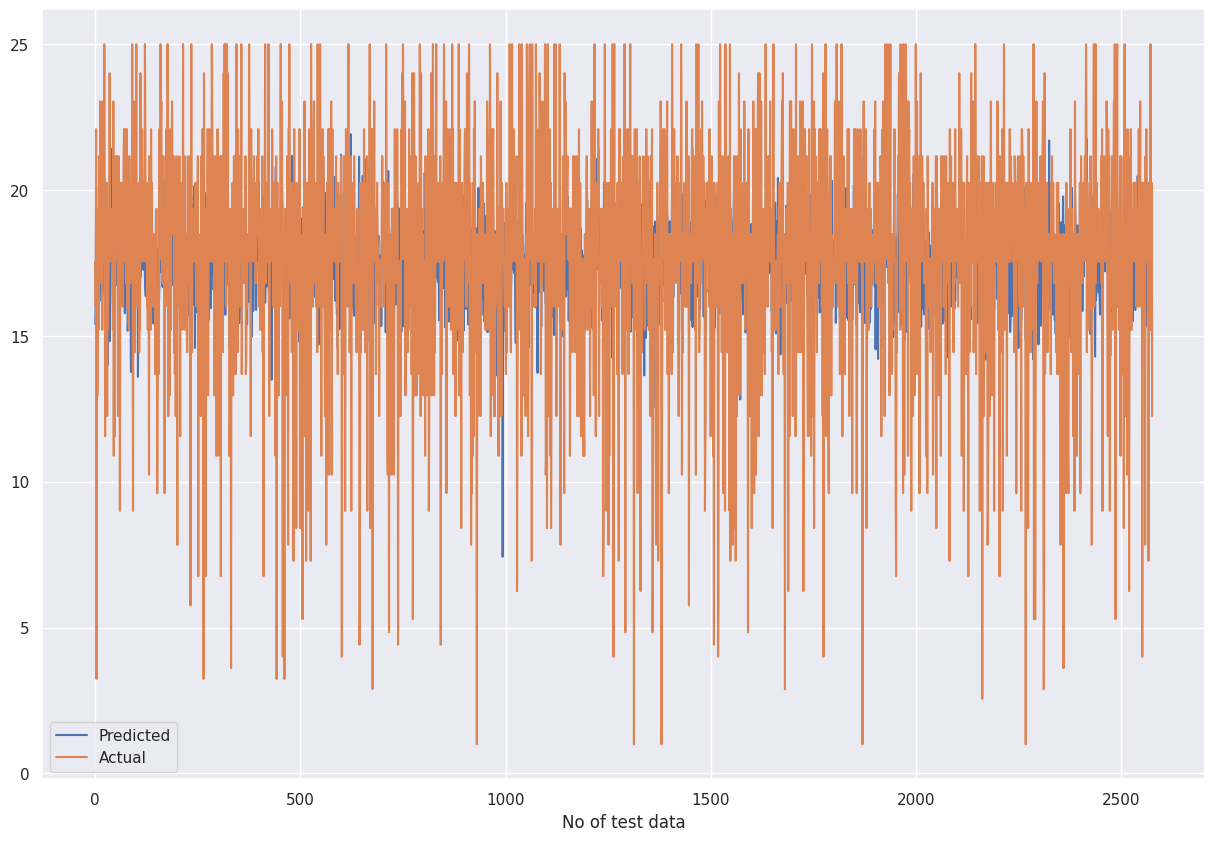

In [207]:
# Plotting Predicted values by Linear Regression and Actual values

lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of test data')
plt.show()

<ipython-input-208-deb5cf3528c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test- y_pred),bins=20)


Text(0.5, 0.98, 'Residual Analysis')

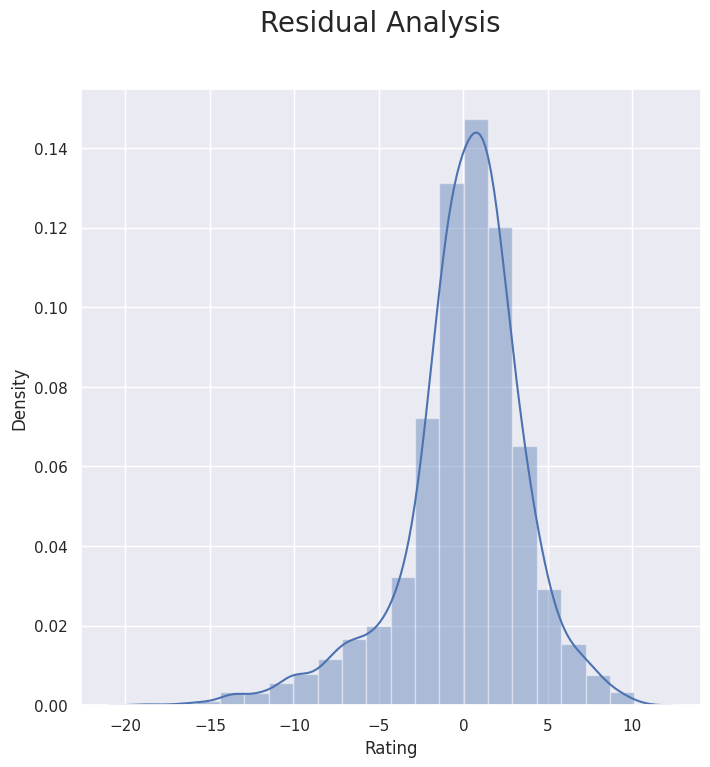

In [208]:
# Plotting the distribution of residuals
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test- y_pred),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)